In [314]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import make_blobs
import time
UNCLASSIFIED = False
NOISE = -1



In [369]:
def _dist(m,p,q):
    p = m[:,][0]
    q = m[:,][1]
    
    dist_sq = np.zeros((m.shape[1], m.shape[1]))
    
    for i in range(m.shape[1]):
        dist_sq[i] = np.sqrt(np.power((p[:,i] - p), 2) + np.power((q[:,i] - q), 2))
    return dist_sq

def _eps_neighborhood(m,p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    p = m[:,][0]
    q = m[:,][1]
    
    res = _dist(m,p,q)
    return res < eps

def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    p = m[:,][0]
    q = m[:,][1]
    
    for i in range(n_points):
        each_point = _eps_neighborhood(m,p,q,eps)[i]
        sub_seed = []
        for j in range(n_points):
            if each_point[j] == True:
                sub_seed.append(j)
            
        seeds.append(sub_seed)  
    
    #idx = seeds[point_id]
    #return m[:,idx]
    return seeds[point_id]

def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    neighbors = _region_query(m, point_id, eps)
    if len(neighbors) < min_points:                     
        classifications[point_id] = NOISE                # noise point           
        return False
        
    else:
        classifications[point_id] = cluster_id           # when >= min_points
        for idx_pts in neighbors:
            classifications[idx_pts] = cluster_id         #classifications' index[16, 21, 22, 35, 49, 51, 58, 68] = cluster_id

        while len(neighbors) > 0:
            subpts_neighbor = neighbors.pop()                #select neighbors' each index point to test
            each_neighbor = _region_query(m, subpts_neighbor, eps) #if each also fits in min_points in eps

            if len(each_neighbor) >= min_points:
                for i in range(len(each_neighbor)):
                    new_pts = each_neighbor[i]                #find those unclassed and in the eps radius 
                                                              
                    if classifications[new_pts] == NOISE or classifications[new_pts] == UNCLASSIFIED:
                        if classifications[new_pts] == UNCLASSIFIED:
                            neighbors.append(new_pts)
                        classifications[new_pts] = cluster_id
        return True
    
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]   #80
    
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    
    for point_id in range(n_points):
        if classifications[point_id] == UNCLASSIFIED:  #until false, it will be grouped in new cluster
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points): #true or false
                cluster_id += 1
    return classifications

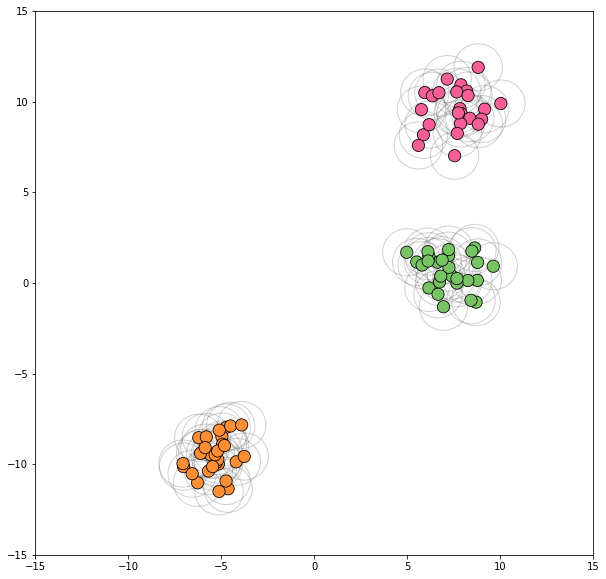

In [382]:
%matplotlib inline
import dbscan_lab_helper as helper


dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

a = dbscan(m, eps=1.6, min_points=5)
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

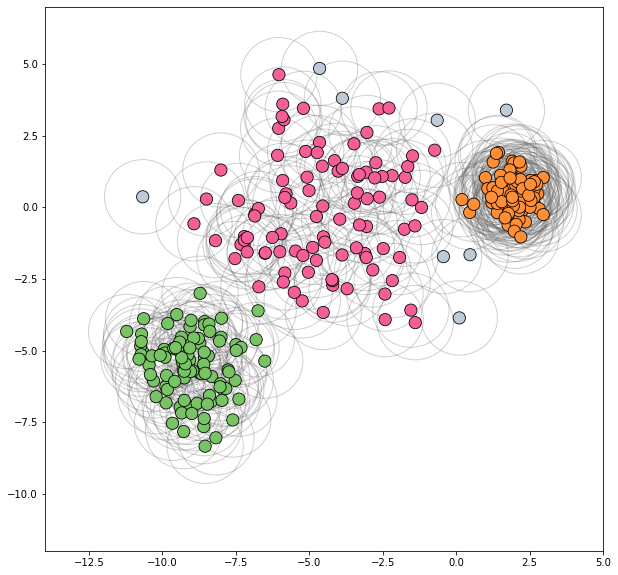

In [390]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()   # (2, 300)

b = dbscan(m, eps=1.3, min_points=5)

result = np.asarray(b)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
